<a href="https://colab.research.google.com/github/dollatrahul/Fungiclassification/blob/main/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --root-user-action=ignore split-folders

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import splitfolders

In [4]:
input_folder = "/content/drive/MyDrive/Colab Notebooks/defungi"
output = "output"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.80, 0.20))

Copying files: 9114 files [03:15, 46.61 files/s] 


In [5]:
dataset= tf.keras.preprocessing.image_dataset_from_directory('/content/output/train')
class_names = dataset.class_names
class_names

Found 7290 files belonging to 6 classes.


['.ipynb_checkpoints', 'H1', 'H2', 'H3', 'H5', 'H6']

In [6]:
image_size = 256

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   vertical_flip=True)

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator_with_aug.flow_from_directory(
        '/content/output/train',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator = data_generator_no_aug.flow_from_directory(
        '/content/output/val',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 7290 images belonging to 6 classes.
Found 1824 images belonging to 6 classes.


In [7]:
resnet_model = ResNet50(include_top=False,weights="imagenet")
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
res = tf.keras.layers.Dense(6, activation="softmax")(x)

model = Model(inputs=resnet_model.input, outputs=res)

# Freezing the pre-trained layers so that we do not have to update weights ourselves
for layer in resnet_model.layers:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [9]:
hist = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3,
    verbose=1
).history

model.summary()

Epoch 1/3
228/228 [==============================] - 2358s 10s/step - loss: 0.7376 - accuracy: 0.6996 - val_loss: 0.6690 - val_accuracy: 0.7368
Epoch 2/3
228/228 [==============================] - 2337s 10s/step - loss: 0.6728 - accuracy: 0.7292 - val_loss: 0.6019 - val_accuracy: 0.7527
Epoch 3/3
228/228 [==============================] - 2339s 10s/step - loss: 0.6431 - accuracy: 0.7413 - val_loss: 0.6044 - val_accuracy: 0.7675
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0    

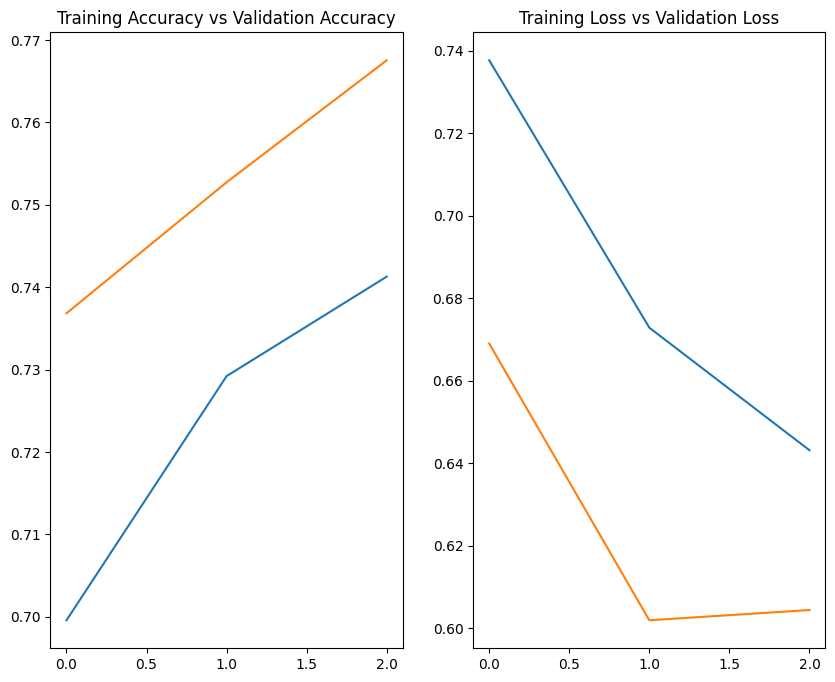

In [12]:
acc=hist['accuracy']
val_acc=hist['val_accuracy']

loss=hist['loss']
val_loss=hist['val_loss']

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(range(3),acc,label='Training Accuracy')
plt.plot(range(3),val_acc,label='Validation Accuracy')
plt.title("Training Accuracy vs Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(3),loss,label='Training Loss')
plt.plot(range(3),val_loss,label='Validation Loss')
plt.title("Training Loss vs Validation Loss")
plt.show()

In [13]:
model.save("defungi.h5")

In [24]:
import cv2



In [41]:
array=model.predict(validation_generator)

57/57 [==============================] - 479s 8s/step


In [47]:
array=(array == array.max(axis=1)[:,None]).astype(int)

In [48]:
array

array([[0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [50]:
arra2=validation_generator

NameError: ignored